# 1. Introduction

Welcome to this notebook where we will venture into the world of Machine Learning with one of its simplest, yet powerful techniques: Linear Regression. Here, we will predict the median price of homes in various Boston neighborhoods, using the widely-used Boston Housing dataset. This is a regression task, meaning we are trying to predict a continuous value (house prices) rather than a discrete label (e.g., spam or not-spam). Let's dive right in!

# 2. Importing the Necessary Libraries

As a good practice, we always start by importing all the libraries we'll need at the top. This makes it clear what our dependencies are, and ensures we have everything we need before we start coding.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,accuracy_score

# 3. Loading the Dataset

Now, let's load the Boston Housing dataset.

In [3]:
data = pd.read_csv("../data/titanic.csv")

### Columns Definitions:
- PassengerId = Passenger Id
- Survived = Whether Survived or not: 0 = No, 1 = Yes
- PClass = Ticker Class 1 = 1st, 2 = 2nd, 3 = 3rd
- Name = Name of passenger
- Sex = Sex of passenger
- SibSp = No. of siblings / spouses aboard the Titanic
- Parch = No. of parents / children aboard the Titanic
- Ticket = Ticket number
- Fare = Passenger fare
- Cabin = Cabin number
- Embarked = C = Cherbourg, Q = Queenstown, S = Southampton


# 4. Preprocessing for EDA ( if necessary )

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
numeric_data = data.select_dtypes(include=[np.number])

# 5. Exploratory Data Analysis ( EDA )

Before we dive into modeling, it's a good idea to explore our dataset. This can include looking at the raw data, checking for missing values, visualizing the distributions of variables, and understanding the relationships between different variables. See at `cheatsheets/...` for a Cheat Sheet on all the basic things to look for.

In [9]:
data.shape

(891, 12)

In [10]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
for col in data.columns:
    print(col, ':', len(data[col].unique()))

PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 89
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 148
Embarked : 4


<Axes: >

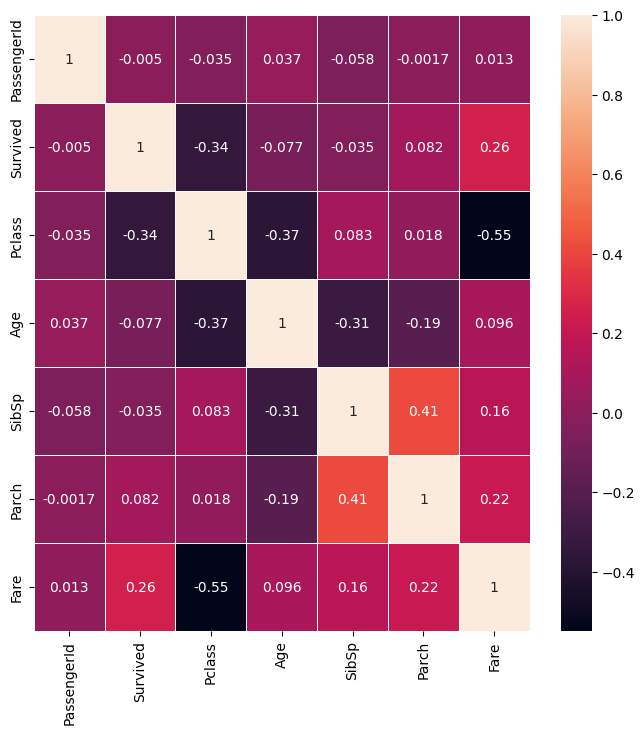

In [38]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(numeric_data.corr(), annot=True, linewidths=.5, ax=ax)

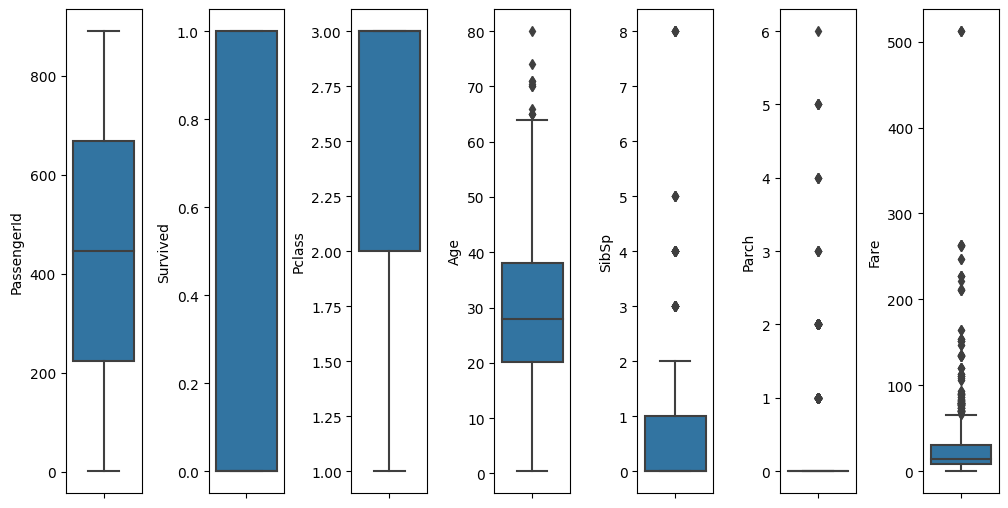

In [47]:
fig, axs = plt.subplots(ncols=7, nrows=1, figsize=(10,5))
index = 0
axs = axs.flatten()
for k, v in numeric_data.items():
    sns.boxplot(y=k, data=numeric_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=.4, w_pad=.5, h_pad=1)

/var/folders/zy/lskfvfbn4sjb60xdtvky2y9w0000gn/T/ipykernel_18429/2109043918.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/var/folders/zy/lskfvfbn4sjb60xdtvky2y9w0000gn/T/ipykernel_18429/2109043918.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/var

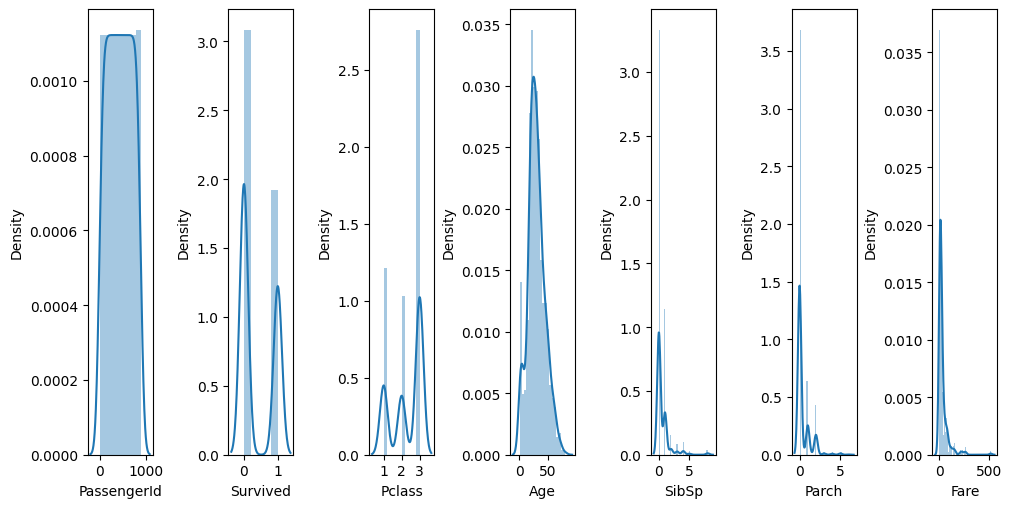

In [52]:
fig, axs = plt.subplots(ncols=7, nrows=1, figsize=(10,5))
index = 0
axs = axs.flatten()
for k, v in numeric_data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=.4, w_pad=.5, h_pad=1)

In [54]:
numeric_data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

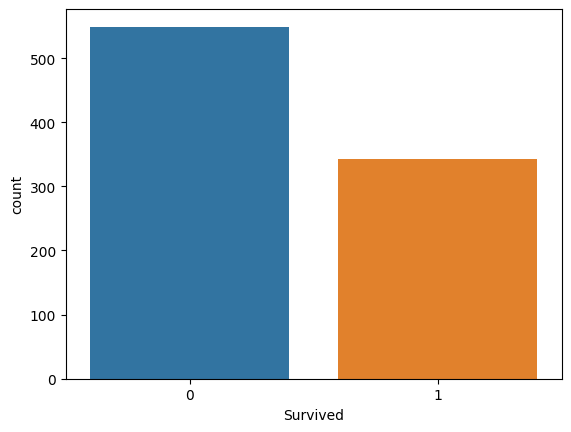

In [59]:
sns.countplot(x="Survived", data=data)

# 6. Data Preprocessing

Before we dive into modeling, it's a good idea to explore our dataset. This can include looking at the raw data, checking for missing values, visualizing the distributions of variables, and understanding the relationships between different variables. See at `cheatsheets/Preprocessing.md` for a Cheat Sheet on all the basic things to look for.

In [61]:
# Fill missing age with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Drop Cabin because too many values are missing
data.drop('Cabin', axis=1, inplace=True)

# Fill missing embarked with most frequent value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns
data.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [62]:
X = data.drop(columns=["Survived"])
y = data["Survived"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [69]:
X_train.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [71]:
# Encoding of categorical data
X_train = pd.get_dummies(X_train, columns=["Sex", "Embarked"])
X_test = pd.get_dummies(X_test, columns=["Sex", "Embarked"])

# Encoding of numerical data
columns = ["PClass", "Age", "SibSp", "Parch", "Fare"]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [80]:
# Handle class imbalance on "Survived"
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# 7. Model Implementation

Finally, we come to the heart of our notebook: implementing the Linear Regression model! We'll fit the model to our training data and make predictions on our testing data.

In [82]:
log_Reg = LogisticRegression()
log_Reg.fit(X_train, y_train)

LogisticRegression()

In [84]:
log_Reg.score(X_test, y_test)

0.8156424581005587

In [89]:
y_pred = log_Reg.predict(X_test)

# 8. Model Evaluation

After we've made our predictions, we need to evaluate how well our model did. This will usually involve some sort of error metric, like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE).

In [90]:
accuracy_score(y_test, y_pred)

0.8156424581005587

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       105
           1       0.76      0.81      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [92]:
roc_auc_score(y_test, y_pred)

0.8149292149292149

# 9. Conclusion

In this final section, we'll recap what we've done and learned in this notebook. We might also discuss what we could do in future projects or how we could improve our current model.

Remember, these are just guidelines. Your notebook should reflect your own style and approach to data science. The most important thing is that your notebook is clear, logical, and informative. Happy coding!

Note: You can insert these section headings into your Jupyter notebook by changing a cell's type to "Markdown" and typing in the text. You can run a markdown cell in the same way you'd run a code cell (Shift+Enter).

--- Conclusion ---